# time comparison of calcimp by C and Python

Fisrt make a thin sliced taper data to compare calculation time of calcimp by C language and Python. 

In [4]:
def yy(x):
    return (20*x/1000 + 10)

In [5]:
yy(0)

10.0

In [6]:
yy(1000)

30.0

Write data for legacy C version of calcimp.

In [8]:
f = open('taper.men','w')
f.write('% 10 - 30 taper\n')
for i in range(1000):
    f.write('{0},{1},1,\n'.format(yy(i),yy(i+1)))
f.write('30,0,0,\n')
f.close()

And for new Python version.

In [9]:
f = open('taper.xmen','w')
f.write('# 10 - 30 taper\n')
f.write('[,\n')
for i in range(1000):
    f.write('{0},{1},1,\n'.format(yy(i),yy(i+1)))
f.write('30,0,0,\n')
f.write('],\n')
f.close()

Compare calculation time.

In [10]:
!time ~/develop/kanutils-20180129/calcimp taper.men -o taper-c.imp

1.63user 0.00system 0:01.73elapsed 94%CPU (0avgtext+0avgdata 3388maxresident)k
240inputs+104outputs (1major+199minor)pagefaults 0swaps


In [37]:
!time python /home/yoshinobu/Py_files/calcimpy/calcimpy.py taper.xmen -o taper-python.imp

74.90user 0.20system 1:17.15elapsed 97%CPU (0avgtext+0avgdata 40096maxresident)k
0inputs+128outputs (0major+5968minor)pagefaults 0swaps


Well, C version is much faster.

Plot data to check that they are same.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
dataC = pd.read_csv('taper-c.imp',header = 0)

In [40]:
dataPy = pd.read_csv('taper-python.imp', header=0)

In [41]:
dd = pd.DataFrame()

Merge data for plotting.

In [42]:
dd['x'] = dataC['freq']
dd['C'] = dataC['mag']
dd['Py'] = dataPy['imp.mag']

In [43]:
dd.head()

,x,C,Py
0,0.0,0.000000,0.000000
1,2.5,17.049790,17.049790
2,5.0,22.756080,22.756080
3,7.5,26.142639,26.142639
4,10.0,28.568486,28.568486


In [44]:
dd.tail()

,x,C,Py
796,1990.0,58.207638,58.207638
797,1992.5,57.326314,57.326314
798,1995.0,56.475939,56.475939
799,1997.5,55.651536,55.651536
800,2000.0,54.848043,54.848043


/home/yoshinobu/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


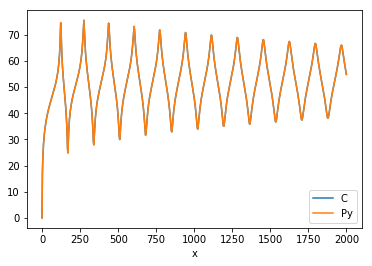

In [45]:
dd.plot( x = 'x', y = ['C','Py'])